# Simulation

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time
from scipy.optimize import curve_fit
import heapq
from matplotlib import rc

In [49]:
def Protocol(time, budget, size, rates, tape, opt_reward):
    ''' 
    Interaction between the algorithm and the enviornment
    input: time horizon T, algorithm budget, algorithm epoch size, reward rates, reward tape, optimal reward
    output: reward tape of N samples, optimal reward, expected algorithm reward, expected regret
    '''
        
    alg_rewards = []    
  
    for i in range(N):
        alg_reward = BudgetedExploration(time, budget, size, rates, tape[i])
      
        alg_rewards.append(alg_reward)

    exp_reward = np.mean(alg_rewards)
  
    regret = opt_reward - exp_reward
    
    return regret

In [48]:
def BudgetedExploration(time, budget, size, rates, tape):
    ''' 
    Budgeted Exploration Algorithm 
    input: time horizon T, exploration budget, epoch size, reward rates, reward tape
    output: algorithm rewards
    '''
    alg_reward = 0
    t = 0
    while t < time:
        epoch_tape = tape[t: min(t+size, time)]
        cum_reward = np.cumsum(epoch_tape)  # cumulative rewards of the tape in each epoch
        index = np.where(cum_reward <= -budget)[0]  # cumulative rewards when the budget is run out
        if np.any(index) == False:  # if the budget is not run out, choose the changing arm till the end of the epoch
            epoch_reward = cum_reward[-1]
        else:
            epoch_reward = cum_reward[index[0]]
        alg_reward = alg_reward + epoch_reward
        t = t+size
    return alg_reward

In [45]:
def Instance(step, f, A, phi): 
    '''
    Generate an instance (reward rates of the changing arm). For example, a sine curve with random amplitude, frequency, and phase shift.
    More concretely, consider f(x; A, f, phi) = A * sin(pi*f*x + phi) where A, f, and phi are amplitude, (2*)frequency, and phase shift
    imput: time step 1/T
    output: reward rates of the changing arm
    '''
    
    instance = -A*np.sin(f*pi*np.arange(0,1,step)+phi)
   
    return instance

In [47]:
def OPT(rates):
    '''
    Get the optimal reward of an instance of rates
    '''

    opt_reward = np.sum(rates[rates>0])  # recall that the optimal policy receives reward max(0, E[tape[t]]) at time t
    
    return opt_reward

In [46]:
def Sampling(time, rates, N):
    ''' 
    Generate the reward tape (N reward samples) of the changing arm given a reward rate instance
    input: time horizon T, reward rates, number of reward samples N
    output: reward tape of N samples
    '''
    tape = np.random.normal(rates, 0.0001, size=(N, time))

    return tape

In [160]:
N = 5  # number of reward samples for each reward rate instance
M = 100  # number of random sine curves
H = 26  # max time horizon is T=2^26/sqrt(2)
L = 7  # min time horizon is T=2^(26-7+1)/sqrt(2)=2^20/sqrt(2)
pi = 3.14
T = math.floor(2**H)  # start with time horizon T=2^H
frequency = frequencies[10]
amplitude = amplitudes[10]
phaseshift = phaseshifts[10]
rates = Instance(step=1/T, f=frequency, A=amplitude, phi=phaseshift)  
tape = Sampling(time=T, rates=rates, N=N)  # generate the tape (realized rewards) of the changing arm
opt_reward = OPT(rates=rates)

In [167]:
rates

array([-0.00286511, -0.00286512, -0.00286512, ..., -0.01406845,
       -0.01406845, -0.01406845])

In [168]:
tape

array([[-0.00276354, -0.00270598, -0.00296222, ..., -0.01402084,
        -0.01394932, -0.01409074],
       [-0.00303086, -0.00288586, -0.00291064, ..., -0.01390363,
        -0.014061  , -0.01391461],
       [-0.00286226, -0.00292256, -0.00279886, ..., -0.01417848,
        -0.01429109, -0.0141907 ],
       [-0.00277339, -0.00290987, -0.00255685, ..., -0.01394542,
        -0.01419329, -0.01384125],
       [-0.00272485, -0.00278962, -0.00289599, ..., -0.01407964,
        -0.01428022, -0.01408283]])

In [164]:
opt_reward

285040.1035514506

In [210]:
B1 = (2*amplitude)**(-1/3)*T**(1/3)*np.log(T)**(2/3)  # budget of ALG1
Delta1 = int((2*amplitude)**(-2/3)*T**(2/3)*np.log(T)**(1/3))  # epoch size of ALG1
B2 = (2*amplitude)**(-1/3)*T**(2/5)*np.log(T)**(3/5)  # budget of ALG2
Delta2 = int((2*amplitude)**(-2/3)*T**(4/5)*np.log(T)**(1/5))  # epoch size of ALG2

In [211]:
Protocol(time=T, budget=B1, size=Delta1, rates = rates, tape = tape, opt_reward = opt_reward)

120665.26022062718

In [212]:
Protocol(time=T, budget=B2, size=Delta2, rates = rates, tape = tape, opt_reward = opt_reward)

335405.149888549

In [11]:
'''
This is the main function.
'''

program_start = time.time()

N = 5  # number of reward samples for each reward rate instance
M = 100  # number of random sine curves
H = 26  # max time horizon is T=2^26/sqrt(2)
L = 7  # min time horizon is T=2^(26-7+1)/sqrt(2)=2^20/sqrt(2)
pi = 3.14

# phaseshifts = np.random.uniform(0, 2*pi, M)  # phi~U([0,2*pi])
# frequencies = np.random.uniform(5, 10, M)  # f~U([5,10])
# amplitudes = np.random.normal(frequencies**(-2),0.001,M)  # A~N(f^(-2),0.001)

sqrt_regrets1 = []
sqrt_regrets2 = []

sqrt_opt_rewards = []


for k in range(M):
    start = time.time()
    frequency = frequencies[k]
    amplitude = amplitudes[k]
    phaseshift = phaseshifts[k]
    
    regret_curve1 = []
    regret_curve2 = []
    
    opt_curve = []
    
    T = math.floor(2**H/math.sqrt(2))  # start with time horizon T=2^H
    rates = Instance(step=1/T, f=frequency, A=amplitude, phi=phaseshift)  
    tape = Sampling(time=T, rates=rates, N=N)  # generate the tape (realized rewards) of the changing arm
        
    for i in range(L):
        B1 = T**(1/3)
        Delta1 = int(T**(2/3))
        B2 = T**(2/5)
        Delta2 = int(T**(4/5))
        
        opt_reward = OPT(rates=rates)
        opt_curve.append(opt_reward)

        regret1 = Protocol(time=T, budget=B1, size=Delta1, rates = rates, tape = tape, opt_reward = opt_reward)
        regret_curve1.append(regret1)

        regret2 = Protocol(time=T, budget=B2, size=Delta2, rates = rates, tape = tape, opt_reward = opt_reward)
        regret_curve2.append(regret2)
        
        T = int(T/2)  # consider time horizon T/2 next
        
        rates = rates[::2]  # rates of time horizon T/2, by selecting the even elements from rates of time horizon T
        tape = tape[:,::2]  # tape of time horizon T/2, by selecting the even elements from tape of time horizon T 
        

    sqrt_regrets1.append(regret_curve1)
    sqrt_regrets2.append(regret_curve2)
    
    sqrt_opt_rewards.append(opt_curve)
    end = time.time()
    print(k, end-start)
    
program_end = time.time()
print("program time", program_end-program_start)

0 19.09579825401306
1 18.71092963218689
2 18.75394606590271
3 18.609448194503784
4 18.668042421340942
5 18.597302436828613
6 18.60011887550354
7 18.512654304504395
8 18.647507190704346
9 18.684694528579712
10 18.589853525161743
11 18.541840314865112
12 18.642688751220703
13 18.618370294570923
14 18.65468120574951
15 18.637452602386475
16 18.643269062042236
17 18.685429096221924
18 18.69282817840576
19 18.648361444473267
20 18.601197481155396
21 18.57091760635376
22 18.60977292060852
23 18.5907940864563
24 18.52776026725769
25 18.618340730667114
26 18.5229172706604
27 18.55872869491577
28 18.58562183380127
29 18.6471004486084
30 18.537570238113403
31 18.6510751247406
32 18.687317371368408
33 18.624924182891846
34 18.5602068901062
35 18.64546537399292
36 18.646279335021973
37 18.530680179595947
38 18.669477701187134
39 18.53502869606018
40 18.68317151069641
41 18.628114938735962
42 18.613226890563965
43 18.557156562805176
44 18.588701486587524
45 18.514182090759277
46 18.564897537231445


# Appendix
Below are the data generated in the simulation.

In [16]:
amplitudes

array([0.01038743, 0.01243772, 0.03144206, 0.01429333, 0.03621676,
       0.01433425, 0.01163338, 0.0111186 , 0.02571095, 0.02067458,
       0.01406845, 0.01163763, 0.01785191, 0.0174269 , 0.03973469,
       0.01450638, 0.0261629 , 0.03104869, 0.03761056, 0.01168587,
       0.0191924 , 0.01390507, 0.02583039, 0.00879294, 0.01853921,
       0.01856759, 0.01288979, 0.01383596, 0.01426768, 0.01363091,
       0.01152668, 0.03465673, 0.02170529, 0.0153201 , 0.01840351,
       0.02523029, 0.02461771, 0.01041639, 0.03471461, 0.01068853,
       0.03592607, 0.03788347, 0.02105504, 0.01938202, 0.02209411,
       0.01229393, 0.01520198, 0.01319102, 0.01371655, 0.02539411,
       0.02193877, 0.0239789 , 0.01717182, 0.01772122, 0.02600272,
       0.01410078, 0.01649327, 0.02662151, 0.0121912 , 0.01575328,
       0.01210087, 0.03904851, 0.01315237, 0.02357378, 0.03246014,
       0.01531729, 0.01230036, 0.01075663, 0.02725382, 0.04090433,
       0.01196914, 0.01219861, 0.01067053, 0.01159013, 0.01565

In [17]:
frequencies

array([9.64527018, 9.46910537, 5.62612689, 8.20587289, 5.23007837,
       7.87825075, 9.30084319, 8.41266241, 6.04253974, 7.11994878,
       8.43879643, 8.53451633, 7.61442642, 7.29446349, 5.06897733,
       8.51172364, 6.12665498, 5.66442211, 5.09597238, 8.8727841 ,
       7.25938863, 8.28554862, 5.87762665, 9.94716364, 7.3743177 ,
       6.936154  , 8.38157907, 9.19957564, 8.27339667, 8.36668212,
       8.72795028, 5.48989881, 6.80349843, 8.41513168, 7.52053171,
       6.23077711, 6.48404765, 9.33571442, 5.44203089, 9.08913488,
       5.3212442 , 5.20090152, 6.91119456, 7.07935523, 6.77253832,
       9.0324174 , 7.96180694, 9.28153244, 8.85480433, 6.13671767,
       6.72936871, 6.65763038, 7.48392069, 7.41156439, 6.38798425,
       8.39183687, 7.8148161 , 6.16981644, 9.0043277 , 7.90897999,
       8.9752568 , 5.07621299, 8.89260729, 6.60419133, 5.54607455,
       7.88635676, 9.19728061, 9.22436373, 6.0625756 , 5.07489766,
       9.4971584 , 8.65950308, 9.02714937, 9.21219701, 8.44695

In [18]:
phaseshifts

array([0.42463576, 0.98619468, 6.0817872 , 1.80799331, 0.29014234,
       0.82969359, 0.72322558, 3.13131512, 3.69252389, 5.77232614,
       0.20508994, 4.42469589, 4.21347382, 1.61755751, 2.36859117,
       2.57951208, 1.28892972, 4.51181106, 0.48848352, 1.33100407,
       0.92624822, 5.92765819, 1.06011701, 1.34876655, 3.02022233,
       5.47876977, 5.0749866 , 5.74860041, 1.80183899, 1.86750208,
       3.11680163, 1.69500387, 2.04617058, 4.97036873, 2.53062427,
       0.03289367, 2.26423374, 3.47751186, 3.86804344, 5.15805191,
       0.41849522, 2.11097101, 4.85988996, 2.85355998, 2.24610689,
       3.68241246, 2.42118746, 4.71872877, 1.22012394, 5.27007394,
       5.51348675, 0.39648299, 3.05034439, 0.90839458, 0.34685469,
       5.76603724, 3.70198907, 4.58008943, 4.21069125, 5.58273206,
       3.70562041, 0.85739268, 2.09760214, 5.00968196, 3.3069695 ,
       2.16445283, 0.22590294, 2.40761404, 1.44036341, 1.56651049,
       2.79154398, 4.3991533 , 5.76950695, 2.55913565, 1.91204

In [19]:
regrets1

[[77547.22704342977,
  47921.420945575264,
  29373.56498936381,
  17887.104236106687,
  10729.899895466422,
  6292.485332638818,
  3524.7291330620374,
  1782.2300884179308,
  891.1208703840653,
  445.5497493295479],
 [76860.9442618223,
  47609.62797581116,
  29342.15438110396,
  17944.77416485142,
  10884.301613179257,
  6516.753403978599,
  3799.4550995556824,
  2094.8697299117866,
  1047.3985815589274,
  523.6945582728708],
 [85977.25086017745,
  53799.08159263199,
  33612.4397655901,
  20952.172883892606,
  13025.95400535459,
  8067.833021561084,
  4969.115407895071,
  3038.519666131736,
  1839.0521141664399,
  1100.057020259237],
 [80529.70810690508,
  49958.308751306395,
  30816.602219492845,
  18976.190835951733,
  11589.14285633186,
  6978.482030952529,
  4142.220663541702,
  2376.016049584492,
  1240.4034671006305,
  620.184544590945],
 [90195.90486916876,
  56548.75662220741,
  35398.655789777404,
  22139.360435098824,
  13809.381823765703,
  8611.996084109594,
  5321.20749783

In [20]:
regrets2

[[30177.523403099884,
  20781.125717668066,
  14134.16083761202,
  7153.954096092453,
  5529.62150173545,
  3679.7441805819526,
  2347.6146442785794,
  1381.251680893103,
  821.6924325331092,
  445.5497493295484],
 [33651.5257495002,
  20463.074951995804,
  13142.537194649674,
  8645.449553898608,
  5817.261196368123,
  3370.6957290874225,
  2326.2691853408223,
  1646.5991195385461,
  916.1986457091069,
  523.6945582728705],
 [34389.29840722692,
  23566.155342559505,
  13337.552932179125,
  9809.284907542256,
  6471.26474628468,
  4840.82028567083,
  2594.01050423618,
  2150.924811416798,
  1180.0688898932276,
  709.1962177593898],
 [33298.35253636929,
  22410.573654845837,
  13318.155084284721,
  8077.454144908519,
  5684.326374676377,
  3770.390121006393,
  2597.566946079721,
  1598.6893688004502,
  992.3850634956932,
  576.491173189076],
 [49905.05848145322,
  21823.495383671136,
  14740.563160926482,
  9910.79805337949,
  6309.761761410889,
  3601.292029110464,
  2410.075177929899,

In [13]:
sqrt_regrets1

[[61004.7922413871,
  37550.91677195678,
  22964.89593413425,
  13883.732669816558,
  8245.844656386946,
  4751.349482047172,
  2520.469776661782],
 [60534.435635214875,
  37394.731278618594,
  22981.100229488646,
  14006.617034045308,
  8442.345783768764,
  5003.252603132317,
  2862.4164957495846],
 [68040.03246241726,
  42543.05996977689,
  26583.213117987514,
  16526.884274131677,
  10276.003693741251,
  6329.314806344308,
  3889.164564193763],
 [63285.16844383543,
  39361.459077198466,
  24192.298184888976,
  14824.12847896486,
  9036.08329164876,
  5393.275299728632,
  3153.1760281426355],
 [71419.6032152379,
  44764.93636964096,
  27992.868145323562,
  17476.31372694974,
  10884.869356043175,
  6763.190922842564,
  4184.773354240793],
 [60457.56224928642,
  37443.4135796966,
  23026.56051028466,
  14061.419675844927,
  8522.640983461364,
  5097.673955247876,
  2981.2537725667275],
 [62475.85094740252,
  38574.63748744355,
  23659.80729630837,
  14393.84748379578,
  8651.032611720

In [12]:
sqrt_regrets2

[[23498.968394331256,
  15879.768787438217,
  11112.202490605581,
  6944.3949049652565,
  4052.849248665497,
  3022.267968913764,
  1869.3035851263217],
 [28385.666004389583,
  17380.58448565945,
  10143.505797043152,
  7177.113296528809,
  4587.858612369528,
  2894.7037655795543,
  1784.1487997750592],
 [30575.380397422938,
  17963.90043183937,
  12980.795464445415,
  8114.092956729561,
  5444.002438315358,
  3543.1237061464963,
  2092.8848523451134],
 [26352.648549815087,
  17160.511954282032,
  10866.003564709521,
  7346.006679716491,
  4931.449144562965,
  3029.694469553305,
  2025.7155473301511],
 [26110.35364324163,
  17534.98793604551,
  17734.729851177486,
  7715.572017629769,
  6236.518837553314,
  3419.0550814587023,
  2353.0668243553255],
 [24713.874782178144,
  16853.120021587572,
  10480.302821864549,
  6750.486088632108,
  5027.762547620427,
  3033.986334342861,
  1794.5814360773552],
 [25336.301351924107,
  17016.368275213274,
  10964.831068424584,
  7530.0074808712725,


In [21]:
opt_rewards

[[224678.41978805166,
  112339.2082108913,
  56169.602422311385,
  28084.79952802138,
  14042.398080869434,
  7021.197357293137,
  3510.5969955242795,
  1755.2968146164512,
  877.6467240510365,
  438.8216789816653],
 [274182.96823871543,
  137091.48212396805,
  68545.73906659568,
  34272.867537904654,
  17136.431773568147,
  8568.213891390158,
  4284.104950267864,
  2142.050479714487,
  1071.0232445171644,
  535.509626401475],
 [621690.8303851289,
  310845.40903986985,
  155422.69836724174,
  77711.34303092801,
  38855.66536277535,
  19427.82652869882,
  9713.907111675611,
  4856.9474031762875,
  2428.467549038554,
  1214.2276220180474],
 [297816.57272586296,
  148908.28636293122,
  74454.14318146424,
  37227.07159072916,
  18613.535795371452,
  9306.767897692787,
  4653.383948854037,
  2326.691974389963,
  1163.3459871732102,
  581.672992913708],
 [660596.7736560376,
  330298.3791866353,
  165149.18195193805,
  82574.58333459204,
  41287.28402591024,
  20643.63437157137,
  10321.80954

# Log-log plot for OR

In [4]:
mean_regret1 = np.mean(regrets1,axis=0)
mean_regret1

array([78596.39231874, 48904.75742999, 30287.87131505, 18728.33715413,
       11492.35120487,  6970.20966542,  4185.44793299,  2440.5861415 ,
        1376.68007755,   759.80584821])

In [14]:
mean_sqrt_regret1 = np.mean(sqrt_regrets1,axis=0)
mean_sqrt_regret1

array([61962.37674471, 38552.95798964, 23829.87241656, 14659.46330419,
        8968.32971772,  5409.89759147,  3210.43497301])

In [6]:
mean_regret2 = np.mean(regrets2,axis=0)
mean_regret2

array([32884.36354822, 21335.98864207, 13895.74329859,  9058.66176709,
        5957.51739624,  3808.98224066,  2445.52149744,  1533.62893684,
         985.21270747,   605.99207612])

In [15]:
mean_sqrt_regret2 = np.mean(sqrt_regrets2,axis=0)
mean_sqrt_regret2

array([26334.02155867, 17076.20484173, 11186.04135293,  7228.70590457,
        4751.78761307,  3092.68424491,  1940.14282532])

(array([3. , 3.5, 4. , 4.5, 5. ]),
 [Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5'),
  Text(0, 5.0, '5.0')])

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

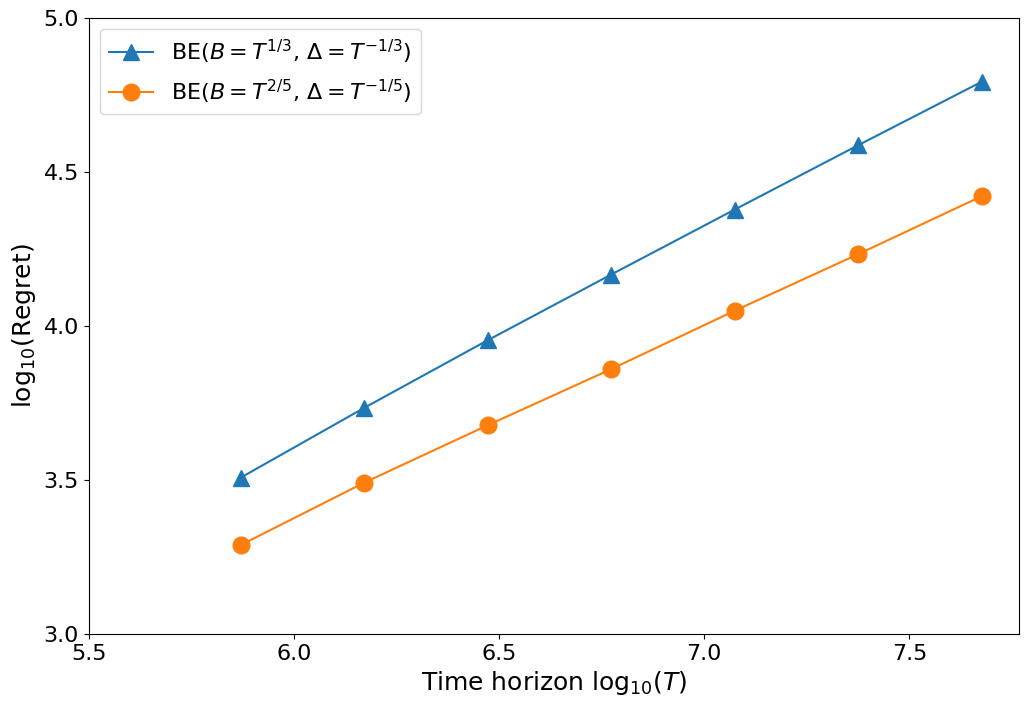

In [41]:
'''
Log-log plot of the relative regrets
'''
plt.gcf().set_size_inches(12, 8)
plt.rcParams["font.family"] = "Times New Roman"

plt.plot((np.arange(26,19,-1)-0.5)/np.log2(10), np.log10(mean_sqrt_regret1), '-^', label="BE($B=T^{1/3}$, $\Delta=T^{-1/3}$)", markersize=12)
plt.plot((np.arange(26,19,-1)-0.5)/np.log2(10), np.log10(mean_sqrt_regret2), '-o', label="BE($B=T^{2/5}$, $\Delta=T^{-1/5}$)", markersize=12)
plt.legend(fontsize=16)
plt.xlabel('Time horizon log$_{10}(T)$', fontsize=18)
plt.ylabel('log$_{10}$(Regret)', fontsize=18)
plt.xticks(np.arange(5.5,8,0.5))
plt.yticks(np.arange(3,5.5,0.5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([3. , 3.5, 4. , 4.5, 5. ]),
 [Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5'),
  Text(0, 5.0, '5.0')])

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

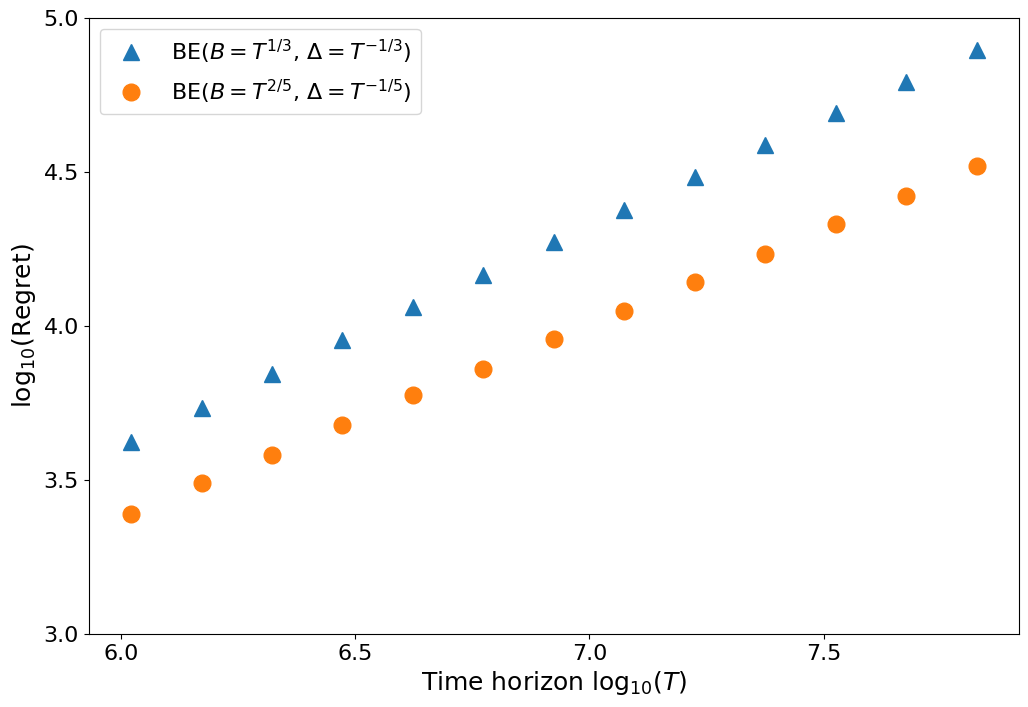

In [46]:
'''
Log-log plot of the relative regrets
'''
plt.gcf().set_size_inches(12, 8)
plt.rcParams["font.family"] = "Times New Roman"

plt.plot(np.append(np.arange(26,19,-1)/np.log2(10), (np.arange(26,20,-1)-0.5)/np.log2(10)), np.append(np.log10(mean_regret1), np.log10(mean_sqrt_regret1)), '^', label="BE($B=T^{1/3}$, $\Delta=T^{-1/3}$)", markersize=12)
plt.plot(np.append(np.arange(26,19,-1)/np.log2(10), (np.arange(26,20,-1)-0.5)/np.log2(10)), np.append(np.log10(mean_regret2), np.log10(mean_sqrt_regret2)), 'o', label="BE($B=T^{2/5}$, $\Delta=T^{-1/5}$)", markersize=12)
plt.legend(fontsize=16)
plt.xlabel('Time horizon log$_{10}(T)$', fontsize=18)
plt.ylabel('log$_{10}$(Regret)', fontsize=18)
plt.xticks(np.arange(6,8,0.5))
plt.yticks(np.arange(3,5.5,0.5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [47]:
x = np.append(np.arange(26,19,-1)/np.log2(10), (np.arange(26,20,-1)-0.5)/np.log2(10))

In [48]:
y1 = np.append(np.log10(mean_regret1), np.log10(mean_sqrt_regret1))

In [49]:
y2 = np.append(np.log10(mean_regret2), np.log10(mean_sqrt_regret2))

In [50]:
x

array([7.82677989, 7.52574989, 7.2247199 , 6.9236899 , 6.6226599 ,
       6.32162991, 6.02059991, 7.67626489, 7.37523489, 7.0742049 ,
       6.7731749 , 6.47214491, 6.17111491])

In [51]:
y1

array([4.89540261, 4.68935111, 4.48126875, 4.27249922, 4.06040889,
       3.84324584, 3.62174194, 4.79212807, 4.58605771, 4.37712172,
       4.16611807, 3.95271157, 3.73318904])

In [52]:
y2

array([4.51698944, 4.32911277, 4.14288178, 3.95706404, 3.77506532,
       3.58080895, 3.38837148, 4.42051719, 4.23239136, 4.04867642,
       3.85906056, 3.67685702, 3.49033558])

Text(0.5, 1.0, 'Regret as a function of horizon length $T$ (synthetic data)')

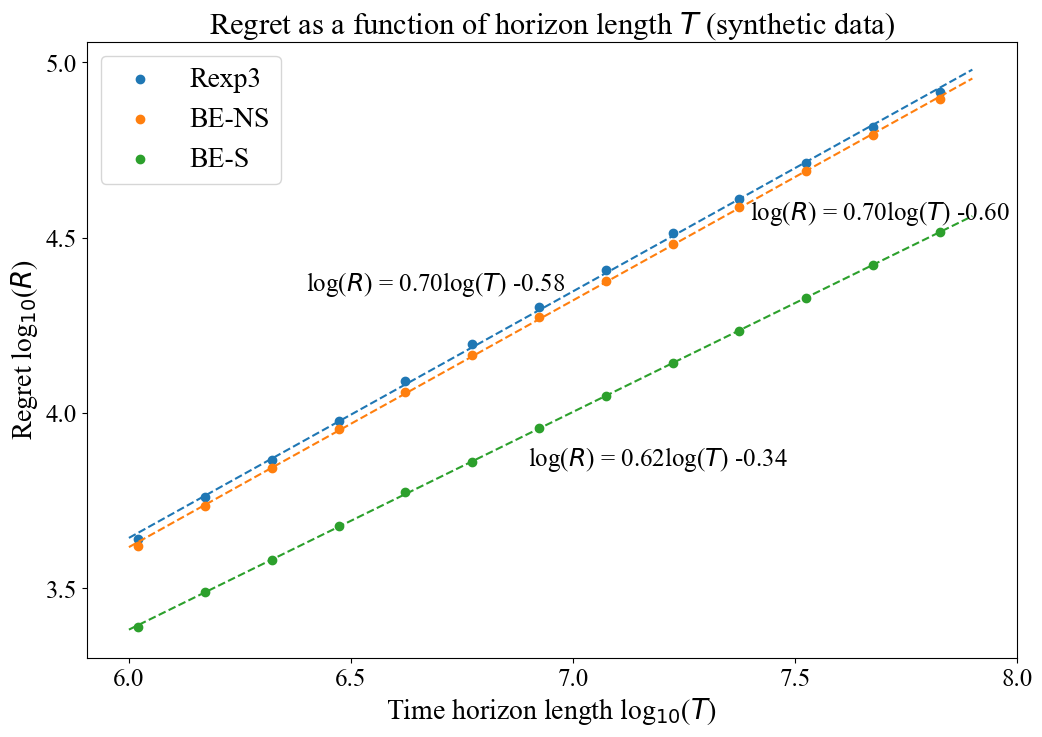

In [43]:
# Given data
x = np.array([7.82677989, 7.52574989, 7.2247199 , 6.9236899 , 6.6226599 ,
       6.32162991, 6.02059991, 7.67626489, 7.37523489, 7.0742049 ,
       6.7731749 , 6.47214491, 6.17111491])
y = np.array([4.91459074, 4.71277061, 4.5120952 , 4.30347512, 4.09091742,
       3.8659532 , 3.63912617, 4.81436192, 4.6110952 , 4.40709764,
       4.19660734, 3.97759743, 3.76102147])
y1 = np.array([4.89540261, 4.68935111, 4.48126875, 4.27249922, 4.06040889,
       3.84324584, 3.62174194, 4.79212807, 4.58605771, 4.37712172,
       4.16611807, 3.95271157, 3.73318904])
y2 = np.array([4.51698944, 4.32911277, 4.14288178, 3.95706404, 3.77506532,
       3.58080895, 3.38837148, 4.42051719, 4.23239136, 4.04867642,
       3.85906056, 3.67685702, 3.49033558])

# Perform linear regression to find the best-fit line
slope, intercept = np.polyfit(x, y, 1)
slope1, intercept1 = np.polyfit(x, y1, 1)
slope2, intercept2 = np.polyfit(x, y2, 1)

# Use Times New Roman font for LaTeX rendering
rc('font', family='Times New Roman')

# Plot the data points and the best-fit lines
plt.gcf().set_size_inches(12, 8)

plt.scatter(x, y, label="Rexp3")
plt.scatter(x, y1, label="BE-NS")
plt.scatter(x, y2, label="BE-S")
plt.legend(fontsize=20)

x_extended = np.arange(6,7.9,0.05)
line, = plt.plot(x_extended, slope * x_extended + intercept, '--', label="log($R$) = {:.2f}log($T$) {:.2f}".format(slope, intercept))
line1, = plt.plot(x_extended, slope1 * x_extended + intercept1, '--', label="log($R$) = {:.2f}log($T$) {:.2f}".format(slope1, intercept1))
line2, = plt.plot(x_extended, slope2 * x_extended + intercept2, '--', label="log($R$) = {:.2f}log($T$) {:.2f}".format(slope2, intercept2))

# Manually position the legend near the best fit lines
plt.annotate(line.get_label(), xy=(6.4, 4.35), xytext=(6.4, 4.35), fontsize=18)
plt.annotate(line1.get_label(), xy=(7.4, 4.55), xytext=(7.4, 4.55), fontsize=18)
plt.annotate(line2.get_label(), xy=(6.9, 3.85), xytext=(6.9, 3.85), fontsize=18)


plt.xlabel('Time horizon length log$_{10}$($T$)', fontsize=20)
plt.ylabel('Regret log$_{10}$($R$)', fontsize=20)
plt.xticks(np.arange(6,8.5,0.5), fontsize=18)
plt.yticks(np.arange(3.5,5.5,0.5), fontsize=18)
plt.title("Regret as a function of horizon length $T$ (synthetic data)", fontsize=22)

# Parameter Tuning

In [172]:
regrets1 = [[2270.517355552467, 1412.9516153560107, 878.7422299741011, 545.8135276232133, 337.99124101174675, 210.39405378070023, 130.48445098962566], [2668.1910874366877, 1659.6214209908503, 1030.223786198927, 640.5445532619196, 398.17001939608235, 247.1103051367645, 153.2911262233365], [7259.785723319161, 4513.624267217354, 2804.9021266771015, 1742.1970514894929, 1081.6804187498346, 671.3693155963665, 416.0583865557019], [3173.7575560307014, 1972.1392266621697, 1226.4978890714701, 763.1214996002964, 473.6749382490125, 294.45178143360135, 181.89612444928935], [8723.098260433413, 5423.866113972152, 3370.283128170413, 2093.570379486104, 1298.752352085612, 806.5413689667221, 499.8111856155083], [3054.909883435932, 1899.8341598681, 1181.04382876624, 734.8435422059702, 455.9444400236134, 283.12226222690333, 175.21643391683938], [2586.3077756086423, 1607.7473381275486, 999.847516391681, 621.3169789995991, 385.7986227930869, 239.44073946157732, 148.3480010803869], [2291.640615883749, 1425.7148684606364, 885.7731020688952, 549.4652755667303, 341.64218044285553, 212.00784137402843, 131.5093718005519], [5527.8497837164905, 3437.633411852643, 2137.903636032861, 1326.9688639649976, 823.4165047563729, 511.03309968020767, 317.0616779707434], [4973.686652589531, 3095.644354105054, 1922.0847389334813, 1195.8832269361374, 742.5565951805511, 461.3501308494633, 285.2297592199011], [3205.486115241365, 1994.1359352058207, 1238.866907698597, 770.9343080161852, 478.50501217136843, 297.3034411411063, 184.0702893949292], [2361.9090729943127, 1469.6203742001962, 912.3850154555839, 567.3060654610526, 352.669425531898, 219.23747871730666, 135.3912990709564], [4014.7911722071585, 2498.1925378569285, 1551.2910066200857, 965.6882342899553, 599.9738567960485, 372.42632560000493, 230.09661479227543], [3606.536680554331, 2244.007443162729, 1394.452045962913, 865.4037484413857, 537.0993903326125, 333.1440211123445, 206.89806979892182], [7623.635550054372, 4736.508465482446, 2943.2197572557197, 1828.0380805643072, 1135.330217840732, 704.2060514711229, 435.762062875423], [3085.990482497902, 1916.9383101990097, 1192.648405431537, 740.6940715079327, 460.00465103584065, 285.60712786031036, 177.10502288448333], [5777.282795546227, 3595.9395498557133, 2232.142263200105, 1388.5942139183608, 862.4773452191148, 535.2450170957854, 331.7319649355595], [7120.826925945352, 4427.098959131923, 2751.5335311623057, 1708.875625128625, 1060.4024540677783, 658.0339829340955, 407.78947616061305], [9092.759597017895, 5653.9232322857715, 3514.353005304438, 2181.6531706978712, 1354.996449866041, 840.7186071033502, 521.0150642986318], [2613.303649177862, 1622.8532386730658, 1009.2444433259661, 626.5793346595638, 389.30779413605705, 241.71081504667472, 150.04169006361872], [4242.918271728617, 2639.6017768118763, 1640.0562887672859, 1018.5224039116802, 632.8746314133532, 392.73276983690266, 243.44201817153134], [3031.2420895280084, 1888.4521466832375, 1171.9191285273846, 728.981800592308, 453.0211131069809, 280.9455526007969, 174.10288654900432], [5471.180928371497, 3404.3308848395245, 2114.5660118514206, 1314.84830426173, 816.6461019665076, 507.005289980556, 313.10071168597096], [1894.5885964833724, 1179.0799431806226, 732.5862047463743, 455.6257449574041, 283.2372708537587, 175.69459318460486, 108.71311166436908], [3671.5883920434862, 2284.564881207334, 1416.757080813608, 881.7732101689471, 548.350086832459, 340.13804893563247, 210.2597333835729], [4264.476510709326, 2654.016089168348, 1648.6909272555931, 1024.2869684802936, 637.0061871788348, 395.2644815092699, 243.92536974913492], [2665.1743156879093, 1657.4111133672704, 1030.2259583633859, 639.9240497618084, 397.27808074765926, 246.81511763390154, 153.43734086323366], [3259.801652337628, 2028.8438850159873, 1260.3667967248402, 782.8612791347805, 486.21129122548155, 302.03881128955436, 187.91520926441945], [3193.415169384214, 1985.4059682647348, 1233.6825774671888, 767.3780095477705, 476.7103435421195, 296.19959366173134, 183.13551830184952], [3079.912915723806, 1915.5250035298232, 1190.1958550824638, 739.7288364384367, 459.7612686094253, 285.77138847870265, 176.93362749013704], [2294.118893657578, 1425.7458141120733, 886.6545178161177, 550.9287957760389, 342.490705309061, 212.2944886346595, 131.0595960397559], [6797.235996427829, 4229.446115116589, 2626.9734586728155, 1633.5618569588405, 1013.1911750721774, 629.9982742171451, 388.9005091079307], [4625.234247133834, 2876.8693930957525, 1787.0881104834552, 1110.5979264144335, 689.3240101555893, 427.74487988803776, 265.0254762502609], [3155.6119541930384, 1962.5631805326848, 1219.2520948556921, 759.1095672955926, 470.47136726946337, 292.0416716232685, 181.1518378492201], [3728.193620753067, 2320.5354118576797, 1441.542952572534, 896.4654081600384, 557.1756837531793, 345.44273609939046, 213.68090591105556], [5663.385622374713, 3522.3700951838982, 2186.1648722654354, 1360.4110837461267, 844.7984766072404, 524.49783728703, 324.98568897233235], [5391.631317773077, 3352.518623500626, 2083.6438557310757, 1293.7262933325037, 803.5338913427622, 498.3190558609276, 308.8214946426424], [2146.8500695494004, 1335.3351007203746, 828.6535342804564, 517.0671724146814, 320.7035382324484, 199.12086466852725, 123.45458663690442], [7382.404559712508, 4590.383364917885, 2851.4916601953155, 1773.649696008666, 1101.3818090204513, 683.9368980810141, 422.964757486905], [2410.0158040482784, 1499.5070738695504, 931.6525909046177, 579.2877161439028, 359.910005057498, 223.50177877774604, 138.1720061279857], [8383.105531389592, 5211.890902849846, 3238.5641882847412, 2011.6402917046653, 1249.585439286253, 774.6067640868314, 480.51779326361975], [7341.256926975097, 4564.036729553831, 2837.219171212375, 1761.5465312595188, 1092.9847412592862, 678.3274499273248, 420.2830361224296], [4560.292030199838, 2836.8169842948264, 1762.469423770337, 1095.610417773969, 680.6878006796032, 422.8940730312843, 261.52948104532425], [3665.0348164376337, 2278.942292657506, 1416.4376497532357, 879.8279305215256, 546.6767527802549, 339.2677916955672, 209.95569570570115], [4640.930107767752, 2885.9770334868517, 1793.4869154156186, 1113.7440354121936, 690.9586503907994, 429.222704965563, 265.9343749295622], [2478.220224948658, 1540.6469140218687, 957.2546284241689, 594.9448669996491, 370.415789087132, 229.650077533277, 142.08121091957491], [3275.0320795610314, 2037.9535238764365, 1268.0275054617232, 786.54987506217, 488.9004808562131, 303.71478069809564, 187.79448907445567], [2943.966864685877, 1832.092006605846, 1138.055120881545, 707.0184944133434, 439.7991266155732, 274.412250813366, 169.0944005333722], [3095.6536905189278, 1925.7503282063699, 1196.5037221926614, 743.366382866523, 462.8326919667379, 286.2060606710511, 177.7137631976666], [5376.852668505278, 3342.4572458209004, 2077.0831797235587, 1290.3549997299851, 800.5028296330129, 497.3441097647883, 308.4648705806594], [4916.478398455947, 3059.053191166953, 1900.3302472052455, 1179.7500733321212, 733.7275941215121, 456.6234589617452, 281.85572895140467], [5701.185421275557, 3549.42679890446, 2203.7030122871947, 1371.2635921637702, 851.721656554022, 528.847630570739, 326.94311799295883], [3459.905016361794, 2152.316852014017, 1337.6560758358246, 832.5186147322675, 515.9311868798795, 320.4114215106438, 198.348957265619], [3844.021161662531, 2389.8427220686863, 1485.3230493804003, 921.3854911323797, 572.736476715294, 355.80650393274846, 220.56129865648745], [5970.349292270257, 3713.5224723426218, 2308.4098989339545, 1434.414346866819, 890.9920736292333, 552.950831313121, 342.42710535449896], [3075.3308226072695, 1913.0112506077567, 1188.2725301145692, 739.0737919010062, 458.8889915913387, 285.8985060616578, 176.33763968445237], [3646.985995433992, 2271.320086188527, 1410.9117518392595, 877.4030821857377, 545.0226142482243, 337.8791452911846, 209.3415093795902], [5606.751171321375, 3486.4300066875876, 2165.977415339672, 1345.6467238759797, 834.913799310365, 518.7059547668287, 321.2588163198179], [2547.4350397088565, 1587.809702331404, 985.7401614525588, 612.7567822122946, 380.4325405103009, 236.15095254960215, 146.47670546624158], [3453.147203874192, 2147.6512887712743, 1334.2057909716677, 828.8543644241436, 514.3860234890017, 319.30218670577233, 197.8409957614158], [2424.7737016819883, 1509.8722083788598, 937.1325004608661, 584.2891112661673, 362.0683276756208, 224.46321398627333, 139.12524943640437], [9088.70789984637, 5648.054205287539, 3510.2510760167206, 2181.0163592951285, 1353.8170462364942, 839.4657513619095, 520.7186548232585], [2776.9648717537057, 1726.2260975936952, 1073.202524814158, 667.1988588071981, 413.87537387312113, 256.2943987144081, 159.19262182579587], [4940.745711854892, 3073.2851609438367, 1907.2729853108322, 1186.8364518719682, 737.9436163831197, 457.71246365725165, 283.07199038184626], [6580.427585554542, 4094.4888123273267, 2542.9224996059784, 1581.3721403009113, 982.3371978778887, 610.151452844977, 376.8712958361666], [3267.6267650276423, 2033.5468418882228, 1262.9172473076324, 786.0575491038835, 488.63912096105196, 303.48594229139235, 187.3460841651522], [2856.6083772804413, 1776.0134859187965, 1103.9754096630859, 686.052689479704, 425.94212940636135, 264.88963121719735, 164.13968420951824], [2139.217909035011, 1330.5340643694508, 826.8920833184166, 514.409224713796, 319.86686606568037, 197.9311258942189, 122.84877123129127], [5958.56977043394, 3707.525595702289, 2301.666168039723, 1431.8769479274633, 889.1420919185912, 552.150793470697, 341.29404637607877], [8730.589267062256, 5428.92702068988, 3373.7722745612264, 2094.9496046849235, 1300.8172762154354, 806.5128125879601, 499.75292256753164], [2454.5823219937156, 1527.217985278403, 948.71811352644, 590.161671976879, 368.24503568062937, 227.6709385122076, 140.524869773295], [2475.8741459611338, 1539.03974971539, 956.9110252884711, 595.6705579814807, 369.9536163939629, 229.4811399903465, 142.0525337230565], [2489.965307430015, 1549.108294058533, 962.7282289059003, 598.0268920822273, 372.12500166784776, 231.13256047441882, 142.9204118599996], [2294.031097114319, 1427.6566756597895, 886.9538850357349, 551.6481367773085, 342.44402134078337, 212.73956175515832, 131.566406554457], [3525.8377600875683, 2193.966035374673, 1363.2320296210091, 846.7265094001268, 525.5303833546132, 326.2235962724171, 202.422893591739], [7317.755814979901, 4552.312037970172, 2825.545438454894, 1755.8797483617818, 1089.6658860867537, 675.5405723726653, 419.2595343584708], [4605.013366157655, 2864.0349730715097, 1780.8444610520237, 1106.046114699122, 686.7945571533419, 425.8291763067682, 263.9924339253339], [2330.88462237129, 1450.502376616554, 901.6724807102728, 560.3238064001707, 348.1073724960006, 215.49930235809006, 133.25513925229097], [6294.4119710634695, 3915.4967549152207, 2430.60969200416, 1513.0440268791135, 939.1118100851236, 583.7848639180229, 360.7725674307767], [7198.758372141747, 4475.9360456329305, 2780.1244662596437, 1727.2394545258867, 1071.8380568339562, 664.7237597844723, 411.82799575632635], [7501.815824134625, 4663.387762318947, 2898.815919796558, 1800.402262706295, 1117.7951667476664, 692.9613930458327, 430.10650728182554], [2563.3823790545284, 1594.4651467303192, 992.1425575533794, 618.4315915362167, 382.9221429740992, 238.0814307594237, 147.1586506761828], [5285.5524259347585, 3289.192652655067, 2041.706395944013, 1270.279052848222, 787.7167135030977, 489.65903188501943, 302.26474920007604], [6875.674031808972, 4278.02244740614, 2656.2562888196844, 1652.006827159741, 1026.605879428549, 637.3831989888422, 394.00479146304315], [5229.79601129645, 3254.604419308598, 2020.8967034767556, 1257.0061469517677, 780.7218890086879, 484.64306856181065, 299.5391248849355], [7809.4221146918135, 4860.157422814053, 3019.974451175076, 1877.3413828939374, 1166.1426996156806, 724.0388584614229, 447.7542487074079], [2180.4303967341257, 1356.741875546737, 842.6431612552988, 524.661720378921, 325.82991685474553, 201.95624028634393, 125.24173437299805], [5238.332712435862, 3257.2444380224333, 2024.1981160066207, 1257.7064858293888, 780.3887321933362, 484.0883707962348, 299.9738725478255], [3357.24531743658, 2088.9150943353015, 1298.2799192803504, 806.5921287050369, 501.0997825874183, 311.09423330358004, 192.57170768868582], [7875.615026585641, 4898.34037082165, 3044.860614440986, 1889.6752286684496, 1172.9897094039407, 727.8589160093543, 451.09481114658774], [2690.909347324021, 1672.9580635176826, 1040.2463044256365, 646.1078735760093, 401.15025682581836, 249.00621269415205, 154.3995109349371], [4072.5824755933136, 2534.3246226130286, 1574.4290622382687, 979.0606973539689, 608.4965392547638, 378.49602732279345, 233.37078574504267], [8410.528204146773, 5231.65908166283, 3251.654054898623, 2019.5429062523472, 1253.151228413728, 777.7953945091831, 481.80073049152634], [3553.6514090574346, 2212.318981859251, 1373.922871791874, 854.8862300275796, 531.1632962699841, 329.833796672634, 204.02233613520002], [7644.827950958163, 4756.8267023305525, 2951.635126489011, 1838.632896461786, 1141.1651267460038, 707.4794037488828, 437.8575841570364], [6532.844304306433, 4064.607777566649, 2523.4006874122715, 1569.0075669107755, 975.0688055317805, 603.9089088505534, 373.9963693457885], [5427.605809543515, 3377.001353874948, 2097.599041392372, 1304.8643753865908, 810.5976264851306, 503.0019738595529, 311.0865307907052], [2434.6808537763427, 1514.307681330305, 941.3025901083602, 585.4416143844028, 363.41495559647956, 225.8231611276069, 140.1269622402515], [5403.80231999472, 3362.0554507808993, 2089.19286873487, 1296.2520857634227, 805.6802389319164, 499.4915923832068, 309.79114331194705], [3759.1501273757895, 2341.285052935942, 1452.4035705676652, 905.1729248855263, 561.4698072355968, 348.31810405111355, 215.7521373454665]]

In [173]:
regrets2 = [[1183.871071098256, 883.8635813272558, 473.5165020919376, 349.3123788524026, 192.6936219674226, 129.39256612816553, 83.73385880769956], [1390.6395301405573, 843.0455746187654, 512.0334496191499, 326.19449661738327, 249.2494528969255, 154.71706526381786, 78.49443853674711], [3021.0884134280495, 1868.862989758316, 1199.946541057463, 836.0672633716895, 514.6895240505037, 355.38335162419025, 214.5920760130739], [1562.7422493040212, 1056.9190558069677, 606.5332347889635, 344.02668761866516, 240.35610850677404, 161.4269035215966, 102.8547579753913], [3417.8565200463636, 2272.740495563892, 1506.9060656001966, 918.8210801126261, 589.8479141550561, 392.85433343716795, 268.5871363807619], [1583.7429894678062, 785.2439646700514, 544.1545348255022, 361.6512843497185, 248.77410046553268, 155.9921882591807, 86.34939498921176], [1218.3572434596717, 743.8946355823427, 575.5076031911303, 411.77373964635626, 214.5504770898806, 145.30084443441137, 82.15508709028745], [1097.8307243294548, 629.1913735488924, 457.2919255145316, 293.3481121906807, 205.82039012077257, 122.93914020565808, 75.67205631427441], [2448.96384549106, 1596.4038669752772, 921.3762334425992, 618.3197398388293, 387.10561980294005, 257.6292225267898, 164.59769043318374], [2201.947088734014, 1519.5788981523365, 873.7426500209694, 553.2533345828924, 366.15309893529775, 236.0527389003728, 156.57377734327565], [1377.9677140472922, 885.0981704020815, 677.1860639155784, 407.0409457915739, 250.9072996482937, 168.43620599201677, 113.05312150366444], [1104.775838355301, 667.5978992364835, 478.889849070154, 292.70118174149684, 209.02727235474958, 134.19851317698885, 72.15336221363305], [1736.7446079947986, 1155.2620219244563, 762.6649872195412, 475.4454543371612, 282.360734666956, 198.44471901920406, 138.14360762080742], [1729.0057469384046, 1054.8717340049043, 653.8854581217456, 465.2372607013094, 280.7198593027824, 169.30840784301836, 105.19892730942593], [3057.665920734289, 1972.4028495000093, 1299.8585400717857, 817.4362357923092, 539.1882261432838, 342.04674909525056, 224.82460871348667], [1811.7352464614087, 985.290639412473, 667.7083411203639, 417.4601263653167, 261.72247099696324, 164.82327453032485, 102.73605059272631], [2353.3280007139547, 1597.6171166494023, 997.6230509846646, 677.3312863343308, 399.0366582064016, 290.2740568712725, 175.03367727117256], [2877.7816006320063, 1724.6007579583675, 1107.9687706555414, 778.5664040123811, 533.3380243419742, 322.38117349568347, 212.92826266297197], [3441.8222025771393, 2277.8617528861505, 1576.2913171816035, 978.7425153236109, 692.7223135358072, 390.60753312721135, 264.8242723379717], [1343.8225201277237, 795.6380007449334, 514.3222242996417, 329.88614099317783, 216.14183519750623, 129.53539777962305, 90.5864009986899], [1794.920125456003, 1345.476693516306, 744.1440850586077, 509.82224473701353, 330.5872716262311, 219.3420892509257, 149.6184478629939], [1479.6392562921392, 1014.1809497317881, 651.3542348111223, 381.28657416843635, 242.68082930079981, 211.00882548996924, 105.03419502809356], [2582.8664710288867, 1505.7393405102193, 848.1900149838184, 620.6375570001401, 397.9029878059009, 267.84885985079745, 156.95394082755593], [1106.3407711471664, 603.3241596118751, 299.9221436303196, 197.77371988405866, 172.8709566987127, 101.09878112780098, 76.54932531758004], [1363.8558911556029, 1003.1272239436803, 675.8241513353714, 485.06723374717694, 306.6209710499934, 183.64236160129076, 126.3730603599115], [1991.2387133943848, 1062.5992360526288, 813.4729465526034, 504.3604177770103, 325.1668695181688, 209.91191396418253, 138.3982298238143], [1299.3591609526775, 869.890104110993, 498.73970996458957, 342.7006966939225, 207.68691068965927, 132.2878228189711, 93.52611034073016], [1628.621709476196, 1024.18260653998, 685.9283975637663, 414.41551625043576, 263.316306938661, 171.2670260497698, 107.67281547244647], [1758.1169061526307, 959.5701755472692, 619.8439514239144, 404.3357181053143, 259.8432775875408, 181.9100616640044, 103.62516837203384], [1428.6137194287148, 937.526992299041, 594.9974562795396, 384.952654820474, 239.989945235473, 158.12638709315797, 103.00189152301755], [1171.5086985003436, 649.9124271843175, 479.8504065525485, 231.54559018887085, 231.59347911455916, 124.80531087833151, 75.16281516425897], [3027.676584331086, 1634.1201664840337, 1176.2231015179423, 816.4564881752303, 490.4545750167017, 314.70425542507655, 208.3382555998869], [1987.3999237770913, 1362.3036986379884, 807.6396490413026, 497.31128822342, 464.74635323071925, 234.40573784308071, 150.75731253307094], [1330.2403114336194, 963.8061516706948, 649.2069997627405, 376.8072603589171, 240.2299584410248, 170.4280039773821, 109.810461779648], [1730.927836865012, 942.0545767238946, 729.8483748331491, 450.8969598404583, 307.3370399993364, 190.01348259191582, 128.2253510959772], [2161.7398767501, 1386.562530581752, 922.9159230699588, 618.2702555185897, 418.2092594024725, 265.30899826867244, 174.90192204040704], [2192.44750222523, 1680.3265320543433, 921.138903906176, 598.6297087066632, 373.81822708993786, 255.47571710929515, 165.760746013063], [1156.3480022240547, 735.3057889997581, 610.1786089393499, 268.8296440662125, 189.9844217213231, 117.07832353473259, 72.16305765007382], [2767.022675455082, 2010.0206412957632, 1230.1513202551869, 851.1945126758656, 523.6651812820201, 338.4708277633763, 222.53858531102378], [1200.8312063235498, 696.2010479410674, 444.7151053182388, 298.97951232144624, 219.87058095153589, 121.68158952222075, 78.5080050524416], [3294.4246049887734, 2383.4658907422563, 1402.159860752552, 901.4704251608637, 543.1538386350658, 392.30320735460555, 254.97751509147747], [3035.5552821262972, 1947.069691712095, 1188.1095983547566, 817.6269636577344, 514.1502542103699, 337.2178251193691, 213.03878390878162], [2011.4309113930794, 1229.7697073493619, 1000.0355107015639, 552.6586305281162, 340.07228402166584, 220.7576972879324, 140.0768944414176], [1760.747806326137, 1107.2529086882714, 654.992398278453, 420.6385936402512, 292.84210034942953, 193.32240225412534, 120.28482680195793], [2053.3487005895586, 1262.9629535710556, 871.957104683388, 544.6351279207302, 389.32021003022237, 241.06033320650567, 128.89844176279348], [1162.87298220495, 715.0836797577795, 527.3785960990353, 301.71818938028446, 198.11957455785523, 155.83815609904923, 83.56909712346715], [1548.0550249539665, 1026.9403482903435, 767.3733739631571, 380.2739198744748, 278.14976519750417, 151.849381459484, 106.87256238370173], [1449.1205227031023, 1297.1829047054634, 605.8596660367475, 426.5167274172709, 229.46980661162888, 163.57093764302772, 114.83683449257751], [1594.5122312385938, 1039.027458901517, 593.2560820623476, 377.3721188593627, 255.7358699360484, 178.27792659461738, 113.50708392935212], [2190.105827345047, 1448.6563462466584, 872.8199821933813, 591.797065784529, 448.0342228549853, 256.36935783625086, 162.07058300976678], [2119.701339652296, 1454.2377984456252, 901.3192922014132, 556.8402277580026, 378.5323474586148, 210.1836488569079, 162.29810279830508], [2098.6607534951763, 1500.650805293175, 1064.979048258334, 646.9505607452884, 407.23505653022585, 268.915408576353, 179.6886950655471], [1488.0266198143363, 969.9492703886935, 621.1905522804154, 442.6393008965679, 269.1141833862639, 177.24771274693921, 116.14825555641801], [1625.3688088910421, 1098.731695294322, 747.6442696999875, 512.9664560893289, 282.06806692219106, 224.6736548165245, 116.6739120995444], [2529.9935182465706, 1565.841922688327, 1012.6576180358097, 678.1650874236802, 439.6536557469117, 290.79309173708134, 183.16811034593866], [1343.449316952203, 1032.0472049971577, 544.9951858199056, 397.58030190158024, 254.96727002775515, 149.87676525669121, 98.26780911483729], [1523.5963395070285, 984.5436137798533, 687.5724236893002, 420.9582651150049, 267.58686421011953, 172.85556543467283, 116.47204201161458], [2530.1753494959557, 1462.9747317993897, 945.4559435977135, 638.8325327435596, 435.8400204833597, 267.25538661120663, 165.49223634667396], [1179.1699710334651, 808.953509790008, 538.6208310439833, 308.4006848085555, 198.77361451987963, 136.30996739665534, 95.76755694467283], [1640.679377185239, 1060.3901603580161, 622.1091383906023, 433.1199827102537, 271.0185396772067, 184.739408751233, 133.39339731854034], [1014.2871933365823, 768.8215749115916, 556.4600234302925, 366.5250019441519, 204.65537652727653, 112.38347839848393, 97.45844086497436], [3585.715543717146, 2300.97725126188, 1545.1853299384238, 971.4740735101659, 621.135779056036, 414.36101268825223, 267.7760563558586], [1351.0715089159203, 832.8259718128538, 536.8869609183603, 363.0647478299288, 221.53632399470735, 148.21020101185786, 101.33633507089053], [2118.3708894331357, 1437.3615839140257, 784.1480890480307, 543.1767798912333, 353.9813221999284, 240.041891863435, 156.37090102055936], [2693.545694175875, 1721.0819949061843, 1084.8015307114983, 698.136335220086, 440.37352567866037, 304.69222033835104, 199.204708059111], [1416.6250184781966, 798.745341785223, 654.7247512374452, 398.30859778619197, 257.03377260281195, 160.29910217862198, 102.78021419576999], [1481.3414490411815, 957.5984287584724, 517.5108860513137, 376.94239353809826, 261.0639990201944, 164.7057252729992, 105.11977592482117], [1143.8904090118303, 719.4385410332179, 453.136594258227, 313.6438454692252, 186.8717733535177, 118.21263882251606, 83.42961524757493], [2841.3240583167644, 1552.190744708816, 1001.759284071828, 791.4584555206966, 444.15043034292466, 285.6356834973376, 189.17427566172591], [3535.88141325349, 2236.740966198966, 1524.8907327488705, 933.2513302755688, 645.9517143159173, 402.97117365365557, 251.89981686526335], [1303.6523997507174, 993.2475326123531, 607.8469001603662, 331.598645793827, 211.2532086376923, 162.8837584818757, 69.89037026801088], [1128.0347954738536, 828.0381278973655, 519.2152955381025, 316.53360951918876, 208.8659795415624, 135.42341810803555, 92.99799521530713], [1238.259001865721, 901.7625874685618, 473.3014877918249, 303.64702957669215, 191.23280388438616, 138.30686597942258, 78.09506159579678], [1210.8202166488045, 810.4937955197238, 447.5227342537546, 301.86046877376066, 220.27061780059012, 135.0707432770123, 79.09415476701179], [1817.7542701704078, 1171.9161768850172, 674.9276538078411, 475.6901759777393, 273.74844908669183, 182.28547956613693, 121.37158448285209], [2911.4059026517207, 1843.454486329225, 1406.421301358845, 795.3058490136318, 495.9623787528035, 309.751534813593, 205.56454260826467], [2053.602017215686, 1174.513349189161, 831.4031049714831, 578.7536809384619, 359.3665397993973, 213.99162949664242, 155.6761067127036], [1234.5931109029334, 812.0825055202586, 521.3651534471283, 316.97082246082573, 210.18599394428747, 137.74648319360494, 85.84708043651335], [2885.607835447765, 1705.926827076124, 1055.943225573399, 689.7661111874477, 440.3079000023208, 325.6145075774839, 179.4553707675641], [3172.8541892336216, 1897.6211698349216, 1248.608213908883, 785.3469311660592, 519.9847457117576, 314.1191753093626, 211.07313665963557], [3365.5471752560697, 1892.8951396514894, 1169.6291301255114, 807.6244127345853, 522.378977038592, 342.4486353855391, 221.3727980893891], [1341.733230488433, 964.425031531573, 514.8424324545122, 308.1815349037388, 222.54496866642876, 145.25064607494187, 90.10128917697466], [2406.4488717223285, 1701.575857409829, 925.2977486262098, 617.3746933008588, 391.2071796908531, 262.20820596773774, 167.98769990137953], [2763.642161059426, 1636.4344255636097, 1073.8103098075953, 729.8072194755223, 491.53523639620835, 292.774411990682, 197.71574370267808], [2278.205914973747, 1453.435061356402, 923.7844089831051, 602.2978401916334, 401.36706091929227, 252.44042860464833, 159.6804664280462], [3085.4127114814473, 2048.1241874594125, 1296.5943567695795, 909.873523949922, 533.8525373582961, 384.7496869878596, 234.4367223515219], [1204.099304087198, 656.333221855326, 548.1992483790527, 290.9315625987838, 268.8576806756864, 120.86838432672721, 108.05350725869903], [2265.8655583957443, 1447.7065675845952, 974.5243855057051, 600.9195937405311, 339.75599725940265, 242.54702751417426, 164.68459195636206], [1780.3528368757688, 1053.9162171389908, 802.6073191068426, 417.79395165346796, 260.3865569825575, 169.4331488745047, 120.89753510553783], [3042.4045467783, 2043.86182303651, 1397.0699388669163, 836.1515825975803, 543.4585410304571, 336.87584036818225, 231.12530996010355], [1354.8877570086916, 769.8728437194368, 507.6103189413043, 439.38471061692326, 230.85612229788785, 145.22175247981068, 96.16894145254764], [1557.9952918568742, 1074.9088347830111, 710.9820971545414, 488.85620270168874, 316.6059900293367, 201.3500137008832, 127.84064755545751], [3264.0646453915397, 2136.1934980700025, 1412.9322777204798, 940.6962007961265, 550.054840074401, 416.49579132791405, 258.42356581110835], [1873.1569237522199, 1099.53586500659, 689.515786135511, 442.6993299834867, 280.3944945123003, 180.7544658420029, 123.6638471853812], [3213.1246873803902, 1962.1988490585354, 1220.8502556629537, 878.2563158925041, 534.6463265245984, 373.4088329613078, 221.26469597962205], [2820.7843604371883, 1697.2464375531417, 1158.3563881299342, 736.3557717442018, 479.3058433505503, 299.2512909950383, 202.6702885642353], [2246.53632789274, 1427.4570066643646, 852.8758899268578, 712.9092021556862, 394.51912512723356, 229.8036483716478, 151.5849213880283], [1152.4661159411771, 587.7901990148821, 514.6315971321528, 313.76463189779315, 228.89818878937695, 137.70096083335739, 71.71320862822768], [2561.7301141043426, 1570.119278968661, 942.2514753970318, 609.2096539762715, 407.9986833840667, 258.1193963658916, 181.63317994416866], [1813.5039521352155, 1031.029278868984, 795.1982170791453, 438.51787206498557, 270.0096565729873, 214.9573476487676, 114.08616670011088]]

In [174]:
sqrt_regrets1 = [[1791.0485973103496, 1114.4345055262966, 692.27720390787, 430.40962532786216, 267.5692533311376, 165.8004496551148], [2104.4320484656782, 1308.5551181732008, 812.4933211620664, 506.03328942804364, 313.77465381025286, 194.40066256187674], [5724.429830667563, 3558.365908171778, 2210.027812781118, 1373.1649495893726, 851.9647790320341, 528.4773371019946], [2502.8220014127437, 1555.2158877699403, 966.5376938344707, 600.713254029477, 372.332607675542, 231.01542490645716], [6877.884850980889, 4275.635063182941, 2654.9653243178473, 1649.2330291151884, 1023.4286088802764, 635.6113933001761], [2410.137479207595, 1495.5223408330203, 930.4594646744663, 578.6144515229425, 358.69600287240246, 222.58945837776264], [2037.315649603348, 1267.721114841639, 788.3088915436529, 489.76106721304313, 304.2503477360442, 188.50910502718943], [1807.3186504445912, 1123.4063025369542, 697.258218540177, 433.6279390725176, 269.33905322388637, 167.06968131534813], [4359.847774715105, 2710.6236274476687, 1683.759647972358, 1046.527000228205, 648.662311547163, 402.147663305841], [3922.0869825705886, 2439.242939968535, 1516.097916024184, 941.7957249060528, 583.3335751730265, 362.4581418510461], [2526.613386072393, 1570.9887670293538, 976.8941047243643, 607.4192921625581, 376.5253402591334, 233.70708152617317], [1864.533549824846, 1158.5277482688252, 721.0161654163749, 448.01821025468234, 278.0495045227108, 172.28742163176412], [3166.570170131745, 1967.6492327750166, 1223.6921010843944, 760.8328719585115, 471.44620863568707, 292.3594453296646], [2844.5177278554183, 1768.0965555344592, 1099.0114613445912, 682.4062489817588, 424.03459322946946, 262.8446295001304], [6009.575537901255, 3734.8903813209618, 2319.552564786776, 1440.757611232315, 893.6371230642253, 554.1280050811183], [2433.134739255591, 1512.3301824219961, 940.3769543564922, 583.6966267005373, 362.2999848582713, 224.99542274332816], [4556.585091639019, 2831.1908389599703, 1758.7751662193768, 1093.7441767104465, 678.5290656878424, 421.19951707170003], [5614.030062504695, 3488.812959190109, 2167.413484200122, 1347.733709033615, 835.2841472566615, 518.4678662826573], [7169.695195757144, 4458.503758840961, 2769.613762475623, 1720.4634192812955, 1067.7265350827583, 662.1055746978436], [2059.5931490135554, 1281.3156608869904, 794.4351304259035, 494.48255601005076, 307.00035512935756, 190.49265387699688], [3345.3053516166983, 2081.6034555892984, 1291.0313337875268, 803.0625449343497, 498.49093422399164, 308.8096062812947], [2390.9408779914374, 1485.8401633441244, 924.1279156638557, 573.5643119670785, 356.4616940754622, 220.83967588391351], [4314.1711248130305, 2681.507702500996, 1666.8193372640671, 1035.5348589617133, 642.0430526549972, 398.2566928341221], [1493.9619380239747, 929.5506482071796, 579.0012796343726, 358.886582153169, 222.82812775344064, 138.305271826438], [2894.892383185448, 1799.331843474094, 1119.5818781252165, 695.3087489019963, 430.7389110364202, 267.3201163497779], [3362.7092449177, 2089.7165162071906, 1299.571309462517, 807.064085101094, 500.89823638257985, 310.79307144732593], [2100.8069968552736, 1307.7062129675614, 812.098578323843, 505.22256653242584, 313.3356408126001, 194.3042377657148], [2570.29212471348, 1598.2268465933157, 992.3347695577322, 617.0214887127077, 382.0348257818241, 237.78058012366637], [2517.791877926531, 1564.806174306912, 972.4144036562284, 604.4610733683767, 374.962415938342, 233.05519830689263], [2428.5959664885304, 1510.1679691441532, 938.9306867066189, 583.4074986176347, 362.0253636341513, 224.82111783087748], [1808.6544233580935, 1124.7735336224287, 698.9119034634132, 434.52003485502064, 269.3753430539, 166.75877822970142], [5360.1829319782555, 3330.2977288779803, 2068.532317094272, 1287.5276802384033, 797.2122748267066, 494.3104603283282], [3647.7942165954737, 2267.698195987934, 1409.4142433835077, 874.8649428873905, 542.8994916919255, 336.65262864226133], [2488.6268787114823, 1546.9321422470675, 959.9990994073742, 597.0230286260121, 370.26415730988447, 229.44509511009164], [2939.1391918646405, 1828.2467174318444, 1135.6291102543764, 705.5951379393082, 437.7799182321178, 271.3756233309359], [4464.310145531781, 2773.89265039732, 1724.9071872319473, 1071.7453847004144, 664.597878703833, 412.4668106154604], [4251.410092694161, 2642.37412861301, 1641.8340495803423, 1019.9429468381786, 632.1544805425874, 392.4126789352795], [1693.2410013128829, 1052.3344375720335, 653.6079286193635, 406.6191022138919, 252.57518768710543, 156.2957368560028], [5818.234192083473, 3616.428300463769, 2248.257881452184, 1397.0446659776935, 866.0811743079175, 537.4446528913504], [1900.139911804872, 1180.8399342213088, 733.8054939776339, 456.7562218716157, 283.3978821572018, 175.56984234487663], [6610.2704463027185, 4109.507787778595, 2553.105890306091, 1586.3775718517136, 984.4072942410094, 609.7767514060233], [5789.568044365849, 3597.273804072989, 2236.9108559743327, 1388.1294460319623, 861.4997597176771, 533.7331880881029], [3594.7048813475994, 2234.544827249483, 1389.1676563141518, 863.2754197950344, 535.3031830350046, 331.9909014187542], [2891.3236811528914, 1794.4678000723943, 1116.4031779965444, 692.9952614807626, 430.3317639216548, 266.491438464549], [3659.1237741509685, 2275.1381931499636, 1412.5549004599598, 876.8337338539641, 544.5428665501095, 337.8708268949413], [1954.2762211365916, 1214.682670114751, 755.1871151495434, 469.2324540453192, 290.8294694021406, 180.67519203954907], [2582.3353830680426, 1603.704427535864, 998.672084642465, 621.2006199649404, 384.57374533238544, 238.62509707864956], [2321.4038676402706, 1444.1920853277115, 897.5478048103469, 557.5234285804945, 346.3968905255333, 214.65770374534713], [2441.698236574215, 1517.8048452604125, 942.8781754109223, 586.2369276390673, 363.7047734812495, 225.78986633530621], [4240.082453116775, 2636.188316818734, 1637.686164959523, 1016.4204299958583, 630.9529561288582, 391.23220281176873], [3876.0209983267123, 2410.349575469794, 1497.249264643222, 930.6313914083657, 577.0440898914057, 358.15744825669026], [4498.281331201724, 2796.7356976349547, 1738.2204317351425, 1080.8759496430066, 669.6277982810352, 415.41704587455934], [2728.021071112016, 1693.9878785985347, 1053.2912422240915, 654.9179464211702, 405.32270789403265, 251.54375014605648], [3031.557122941187, 1885.9933635304915, 1170.2552600741474, 726.959228325497, 451.73313465752653, 279.873547843059], [4707.28985770297, 2927.3760851949046, 1819.7125414103211, 1130.6591403008642, 700.5576529077734, 434.5536065905053], [2425.4145325449645, 1507.8173893707717, 937.1379703788334, 582.2023575261701, 360.9858109407378, 224.0783921251068], [2880.050278941606, 1789.0003730621102, 1111.701196303111, 691.1484815173499, 428.4498017309397, 266.10510348892694], [4421.045335222792, 2747.375051707815, 1708.0567565629754, 1059.9783181321473, 658.1576118333396, 407.8741661772219], [2007.4014578385977, 1247.8947071558214, 776.9541748643387, 483.8593295585415, 299.0526168169854, 186.03323258037653], [2722.713310605468, 1692.9231547314266, 1051.4090151241326, 653.1147538669429, 405.3428228886569, 251.36236382730203], [1913.2224330409663, 1188.9629096517892, 739.0008176129195, 459.25389472644383, 285.0904324283383, 177.05043794456196], [7166.18099829281, 4452.37955265987, 2766.4994038967707, 1718.1222697460325, 1066.7832584374846, 661.4376367414934], [2189.79538204227, 1361.976740031023, 845.6961169893038, 524.4143509679561, 326.1697925981589, 201.7728142243559], [3895.85326240398, 2421.5889841492753, 1504.9235652780044, 934.9044145141015, 579.4458512687415, 359.793623947975], [5188.55750878551, 3225.8831854120654, 2005.411098313445, 1245.955903512644, 772.5641191845098, 478.40219625809914], [2577.3746926343592, 1601.454589386034, 995.0624498675315, 618.339864150912, 383.46512870062907, 237.84939223857236], [2252.2190036516695, 1401.2560824200773, 870.9311451626418, 540.9244278162805, 335.42265702688746, 208.3679035078103], [1686.7270838183467, 1049.6990183339076, 651.6837476198052, 405.33587212178827, 251.82622151209034, 156.0495450868675], [4697.872955072904, 2919.5728757475736, 1815.2658071955375, 1127.74614380383, 699.4581704656448, 433.8514205289375], [6881.42992474779, 4280.343928893213, 2657.1336846335034, 1650.3329504237627, 1025.0830505721824, 634.9103855061585], [1936.0888957001443, 1203.1168592385657, 748.0906031063932, 464.66930950247115, 288.92719447187847, 178.94596618373907], [1951.6954812111799, 1213.4699409889436, 755.1667376272599, 469.32135526273123, 291.6669924720354, 180.6315178852783], [1962.6821370001417, 1220.7416488756862, 758.9946078816938, 471.5030594059317, 292.40541230551753, 181.70326009304426], [1809.3359054221946, 1124.456086587321, 699.5676741302595, 434.72089255368337, 269.5151542294898, 167.13974350319586], [2781.2506005152536, 1729.621479230831, 1074.470167471889, 667.2731567337614, 414.33673788722444, 257.1750173268092], [5769.592264188454, 3586.965315945621, 2226.9933070931, 1383.654568531114, 858.24325448936, 532.1127267923475], [3631.7119448944577, 2255.7210282047163, 1403.0495155543467, 871.2564264167813, 541.1620083583948, 335.42654699824925], [1837.5239072013646, 1141.9832906055963, 710.031941068708, 441.37599538648647, 273.3467715715633, 169.96231459381397], [4962.238174145459, 3085.12855893292, 1918.1460626879998, 1191.7407756053071, 738.2736247577886, 458.1488429275305], [5677.1484368593665, 3526.6215947433957, 2192.7318545788876, 1361.7732074216037, 843.7373180642971, 523.6308642450604], [5915.145726713585, 3678.8670481389854, 2284.7731165711302, 1419.5211317031499, 880.73313588374, 546.2414915903282], [2019.9476174518059, 1256.0570811368525, 781.5029629849741, 485.74047937596333, 301.3495395304235, 187.03038936144276], [4167.51980505453, 2590.732635964174, 1609.7057857062464, 1000.0931025890604, 619.8518253419425, 384.81245712844975], [5422.934806664474, 3370.632052520057, 2093.6358084890817, 1301.3119154783271, 806.8984616491398, 500.63134000162427], [4124.558948579186, 2562.97084469744, 1593.4944139864529, 991.4947189274244, 614.4752325612826, 380.73829611492874], [6160.063500086311, 3828.0426335614466, 2379.186214726622, 1478.175501587386, 917.2320244462935, 568.6909405060451], [1720.1598358282063, 1067.8126092789898, 664.5192381887318, 412.9899246802779, 256.3359907159156, 159.02096876384894], [4131.41511897929, 2567.1954587754444, 1594.7357702724985, 990.71259696169, 614.8959446926456, 382.36995081566783], [2645.2449429797125, 1644.4121757373505, 1022.56967692732, 635.823528110308, 394.2935849079586, 244.58707399626292], [6212.249545296305, 3863.38108317781, 2399.4043911391054, 1489.1374441191292, 924.5004020274137, 572.9662665672549], [2121.0333016696677, 1318.5537514369498, 819.6699785614619, 508.85582358553074, 315.94092027035185, 196.21682624114328], [3214.789808228903, 1996.0560365487472, 1240.5816085623228, 770.818489634803, 478.0609416978077, 296.8074591322056], [6634.000649540685, 4121.991696241777, 2561.8924501557194, 1590.360932616859, 987.1931006778759, 612.6526709467471], [2804.3564092193847, 1742.657146643527, 1083.8088916996421, 673.0925915401203, 417.55496557830884, 258.9826010030056], [6027.855907578953, 3746.1474903232884, 2327.6991506743943, 1446.4660008214414, 896.3295341635821, 556.4428760716291], [5150.63216715958, 3200.0187923229532, 1988.4242816577316, 1236.112504837205, 766.0289023033765, 474.934460921595], [4280.651276834542, 2661.1813595525746, 1653.1085136041365, 1027.7616578450616, 637.3975018335295, 395.42589189035607], [1921.170972850552, 1192.3351022956776, 744.2476284683144, 461.3543842303079, 286.0617725916745, 178.03178800933892], [4260.055032640637, 2647.7339044221444, 1646.2844030244596, 1022.1376917165471, 634.5429015758273, 393.49578732209375], [2967.4625106129097, 1843.337408139152, 1146.3846776101273, 712.238429281304, 441.73785482971107, 274.60454432448023]]

In [175]:
sqrt_regrets2 = [[1155.8823329132283, 647.7454400607967, 373.27809854087536, 226.3839021333515, 157.16682640152067, 95.44224279559057], [1127.451125676016, 678.6360754835041, 479.68018231928, 300.9571530715548, 205.67890006668495, 122.21570500093821], [2318.6658978126943, 1609.4639781006845, 962.0136408772814, 651.3333559470921, 441.85415839975394, 248.92766141538777], [1181.5148121494567, 754.7817594521766, 519.7505136032923, 356.7390551872122, 168.46264840189906, 130.54189069022596], [3165.137549990497, 1793.9200374941283, 1151.0749667639611, 764.1543691686456, 466.6001846060535, 322.34985715064795], [1023.3230447247333, 711.3287320238014, 514.1796661566841, 304.374172924523, 186.1980922788116, 126.81676334914118], [923.1795270545408, 633.7894083399733, 586.0655600090322, 252.1133770419474, 187.8217810889946, 116.85762728932059], [694.9898273942235, 605.8978649784403, 354.93235964277847, 257.06634883526567, 152.5070462404783, 77.44265565150181], [2064.702782298147, 1292.8150678435632, 770.5362154121394, 496.3692578397604, 323.28816391149303, 208.84096080566815], [1652.8660720504122, 1136.7240236335783, 718.2732221154147, 469.21208267170005, 283.3612668135647, 193.11819576216112], [1116.9559470997483, 744.0849019276357, 515.8565835467816, 349.47934553486994, 206.98673799399148, 110.290875967592], [904.4377996088006, 582.0166135602049, 382.542665467794, 264.93756739066157, 160.38733810439044, 94.58734941445618], [1350.3664313468616, 877.8772634755296, 596.7752594887279, 376.38330370585027, 248.6397450603381, 153.14348880840953], [1191.519111446687, 981.7654368283111, 557.2076112551877, 379.87281935801, 218.50405300890998, 147.5996680939552], [2618.1779952256475, 1527.957817267452, 1018.6409136955917, 714.5405733159132, 434.0033269842461, 282.0047663565565], [1239.2755239445833, 848.0265604592569, 452.7294061270659, 311.85054497538295, 257.7697575713937, 121.64381025687999], [1894.6668083376717, 1287.875359805359, 855.2430934673757, 509.8223868739806, 326.1398423150458, 216.3426356569671], [2501.6700722649693, 1503.7539464852016, 936.4580544558412, 633.396303519723, 411.16089536505024, 262.8795806098624], [2757.1467835167423, 1821.7944271753659, 1217.2323313855595, 776.9412684378913, 491.0546763919374, 324.0823377313027], [1065.9633698397374, 698.1788715348375, 427.31553310973686, 294.4473115764704, 178.66660602993215, 121.27682406732492], [1625.6558616019902, 958.7701478697418, 676.749951375692, 388.38655316879886, 253.40173850140854, 177.18584244278827], [1193.8368935670005, 697.6856262660731, 396.76942664192757, 293.7637680177795, 205.61198121461894, 127.87049120731263], [1992.6141845482052, 1167.0858679061348, 767.8421332976286, 482.04032185809046, 313.37291352720786, 213.00619033340445], [728.699365005712, 389.33472514891764, 439.04862186106766, 221.9814898501936, 131.1849364865957, 83.19407957452813], [1315.7050443047192, 736.0946673566359, 523.1693637784192, 348.89299690775806, 232.3865136058339, 150.02685114215637], [1470.6995749830676, 939.2220691990078, 606.399290192363, 406.3066131245796, 254.97698952759856, 170.88430431318375], [938.519143547368, 643.2401719631307, 394.054988500684, 252.28677120947395, 175.79299709822953, 101.93420758015145], [1413.7379170112836, 853.4501447896764, 537.7329436592627, 336.46584828924824, 219.5945630064798, 131.5441020264052], [1166.4331647364597, 703.0780201014859, 504.4406684438218, 337.21915866780546, 202.30448527360386, 136.5611595903365], [1167.1986816931167, 854.99526647522, 457.3844979881542, 315.948204356675, 196.2989379917144, 110.94780530505159], [940.4946906996483, 547.0992664379883, 470.1242566150395, 186.59996385968407, 163.74668195850245, 104.63636044999112], [2202.785462069791, 1370.3777617015876, 940.6959925188567, 597.516251740919, 421.56412858138356, 258.85756598497755], [1680.3449899060652, 1129.5742399579321, 687.3292080448591, 416.1313729332178, 290.281871584888, 175.86188395891259], [1477.9947154875554, 760.7614449932444, 484.7164971198581, 300.1037836976102, 209.628198186625, 106.66087763408268], [1337.6025043529226, 921.3454337269068, 574.1157373851747, 372.345593730839, 231.2696520242389, 153.17471074694367], [1850.6466071869945, 1239.3251511720591, 820.2140772775019, 505.58270642925345, 323.34264779488876, 214.53137482075363], [1897.7268197641242, 1244.6949524412048, 833.6551011868578, 493.15798317657755, 330.91277718593847, 224.71357219323545], [858.2389121274464, 602.1515395216265, 283.36824598971725, 290.79680584745074, 156.00360207505037, 103.20449250507863], [2350.161412174464, 1573.8176105509046, 1030.3557554527652, 723.8569362829003, 436.39864617840794, 274.5328066623988], [952.6861461215303, 657.6766810737754, 406.52769650330447, 258.93955689823633, 160.69431952263767, 111.83790514071188], [2709.3170886838343, 1835.8599666713271, 1064.4541656461952, 749.493614872641, 470.30818889373404, 338.33175438910075], [2411.8551941370824, 1522.764083242393, 1028.4709329826583, 664.2293422845978, 457.5748051859846, 277.0598980834038], [1767.9335581650957, 979.589803080773, 741.747417818784, 467.8711522637677, 287.0837671477857, 180.804910433033], [1407.5833213558071, 715.073419583874, 456.29190318529436, 362.4635508763313, 242.82128391200968, 169.57462863416367], [1785.4633963441593, 1140.2422091866902, 675.0043178929482, 468.70892367358465, 281.5392141740449, 167.1996585512552], [942.2468459904485, 675.3346829182265, 392.6736617502029, 315.7331075820766, 164.98383946845752, 114.82515083388898], [1154.8520959773741, 737.8072319561761, 533.4082018383124, 355.0422036367381, 217.08610782214782, 127.6399143673234], [1058.5045422096737, 741.4854501571972, 448.5718075511686, 348.0569909914848, 207.2702828519432, 138.8631399693495], [1272.2628575488343, 770.3801885431167, 498.46689013417927, 297.52493660629625, 180.60613929224382, 133.22603381337376], [1772.229414000467, 1135.9228718599188, 715.7750496107183, 501.9080747797343, 311.45548154744756, 207.62160410664], [1645.016143344401, 1109.7567823837744, 691.2672235838108, 441.69775858441426, 327.08007721763715, 192.55671485111634], [2255.475131162908, 1292.8134955651476, 783.0736480378982, 519.9081758801258, 325.81326250099664, 213.2554578679792], [1309.2547852295102, 865.9313313741004, 541.9802971351746, 398.8498126123959, 227.17284599147752, 176.63621959242846], [1299.6741892544087, 915.3252309029922, 655.2404986776382, 388.12978463326, 231.86467535737393, 158.05207538799368], [1969.8550165095949, 1269.328453267517, 852.9656738255144, 525.3911175381654, 314.4990734626881, 218.7194183254851], [949.9071942106821, 772.6447442178469, 449.4372565982485, 338.0348910286666, 206.3224875013093, 106.59370415545436], [1243.241912749043, 869.7803017191181, 494.82116067897005, 365.0840023365636, 221.182074737555, 159.04472995694505], [1974.4605776937678, 1390.280951230321, 804.3753676299093, 526.448864304788, 318.8014010960251, 206.2787628340502], [1036.006962923886, 758.2611604217964, 415.85858164444653, 243.17326830010643, 167.97732459951294, 110.61591646259876], [1260.201481335971, 756.2142076762539, 535.8937131692073, 398.196883932178, 207.6382480326938, 137.31812301658283], [1130.3335840403743, 605.1522315235343, 404.68608335802855, 249.99995389912874, 177.44395888467443, 106.63699128842472], [2778.899108825135, 1966.4127574147424, 1281.5410839945107, 781.8064814595491, 519.2823313400659, 332.12016459324695], [1109.5959821893775, 769.9338479384314, 451.5920861018749, 310.9862025674629, 185.59012672415702, 119.79953078566086], [1628.6782967995387, 1132.6428375285177, 690.6640674636292, 457.4851547372309, 297.8756325803879, 194.14020260181496], [2147.432214796776, 1376.250633223157, 867.5254680959915, 585.0475678409566, 376.7729676581257, 248.4787089017591], [1146.2335291950149, 726.5924320474587, 508.0155889709131, 342.2952415081527, 210.27368951503013, 129.25480925010288], [1314.3404345502786, 665.6346713435632, 460.1003437023901, 286.39620981145345, 201.20602988808423, 98.544391679422], [862.3401789199561, 613.0644122677477, 360.16392097174685, 270.4361976390137, 143.72967273706308, 108.93412480283314], [2052.769135240931, 1152.2707202438323, 918.667977874502, 542.6258959122279, 318.2338626592609, 217.77825849472538], [2827.4770593902795, 1875.1316877175122, 1197.6447270124045, 764.1581298572564, 515.6286811714381, 319.1387082102556], [1106.3908131069911, 609.4900140425598, 401.4070305383357, 263.09720073973585, 178.23603053209808, 105.44967043347697], [988.4528115373978, 649.1781674145896, 443.2721222914188, 275.4910920901566, 155.6524680915718, 101.44658067785076], [987.3879562666407, 598.5075262196915, 359.33369247034716, 239.7684628570969, 151.77814548363676, 103.48872877199028], [815.1753179435909, 664.4043935329973, 439.3694879853647, 241.14107608484483, 158.4359367615998, 86.98453243850508], [1245.5475201353547, 870.543960070223, 545.8479148011829, 345.1285979250788, 243.8650192609257, 173.70524067171664], [2407.7248891072813, 1825.0435612028232, 917.3426803690672, 650.5502573758858, 425.6562886257743, 283.9445903394517], [1569.3281556918519, 983.8125865171314, 698.6206206584757, 503.7223839690196, 286.07086026437537, 169.7764622534669], [942.6073808063229, 641.9174244145979, 452.9661570675453, 255.87637817942232, 159.1180671561906, 99.45800865698857], [2100.7091686565545, 1404.2260634785926, 946.2882175220584, 555.8789269843983, 362.8207022702845, 241.89347756830284], [2434.0543925887905, 1507.3340337154223, 1030.2013399790158, 684.6154372428573, 384.4493425224282, 287.6790797741669], [2559.980814877199, 1581.9241240565898, 1067.4167404339532, 641.8622877292801, 416.73518131361925, 280.67776253683405], [933.8766360807931, 587.1613427796692, 426.9092142932859, 260.54392040332823, 223.02079662392316, 117.96209757250745], [1777.7490140834707, 1144.245894095482, 733.4417159640288, 498.03160695254337, 337.80652878914407, 182.57246619280886], [2110.529298460111, 1642.869150735205, 950.0619672341272, 634.0771426542269, 381.4771642291089, 260.58115429647296], [1979.3393990988843, 1132.5588584727375, 797.9925592322252, 492.38549520818196, 318.45346797493403, 219.86649787809074], [2497.188371400174, 1605.993551801279, 1122.9179816470714, 670.3535679457636, 445.22002101307226, 278.87466698613025], [837.7143160201667, 700.7712799559959, 358.45198422612884, 259.60324703944934, 156.09010560645402, 101.58296130075996], [2144.034543506161, 1161.635292027553, 911.6230251140514, 482.8740645350772, 303.27869719374576, 207.00033730108044], [1243.691631100024, 838.1546802311059, 560.1218227085774, 353.1475962110453, 214.7020223955169, 137.46999793480245], [2477.2110399780795, 1799.141688980686, 990.1241610098223, 716.6694488371868, 425.9514192876668, 283.8919234235], [1131.8873634436459, 686.7321413593745, 485.81718909030315, 273.52968933202646, 201.138474071131, 123.5436948424931], [1418.9337240926106, 987.8909815735824, 547.8245097398467, 396.09490768949763, 240.89556441882087, 160.71088746213354], [2658.062952098553, 1776.712350950198, 1079.8060238533071, 745.0936462125246, 454.235338761875, 298.16684041851295], [1403.5320711739478, 935.4963461895532, 525.0140894681608, 350.8832039957597, 220.46057229333928, 129.44893272706122], [2449.737933997414, 1623.1624306839658, 1088.4467371862265, 667.1917098921112, 423.9399118708898, 276.91606371365197], [2156.2794307463337, 1360.811298166751, 915.185697283101, 573.3321819391276, 387.2698732477875, 241.84898844435884], [1890.2139357802807, 1176.1153793709527, 726.7002728427324, 514.5600040248028, 299.4764087148069, 219.3062384629975], [958.9335237862542, 596.816191706268, 419.1646140957964, 235.21058543262188, 134.7866840000861, 111.75610315324138], [1759.1942250966677, 1202.73376858345, 691.6640488526173, 503.0430375181895, 327.2735409728375, 209.7130962994106], [1499.7203304373543, 872.6866058462474, 538.1122694322112, 327.53866088150244, 197.66666004876606, 155.57276635906328]]

In [176]:
mean_regret1 = np.mean(regrets1,axis=0)
mean_regret1

array([4509.82377808, 2805.1960984 , 1742.78139175, 1083.25796419,
        672.68403508,  417.52782929,  258.51621844])

In [177]:
mean_regret2 = np.mean(regrets2,axis=0)
mean_regret2

array([1988.30999109, 1268.17847607,  818.59802139,  530.31111077,
        342.11384591,  221.77345236,  142.44235673])

In [178]:
mean_sqrt_regret1 = np.mean(sqrt_regrets1,axis=0)
mean_sqrt_regret1

array([3556.25704509, 2210.5132221 , 1373.72358047,  853.53997836,
        529.4519548 ,  328.42572874])

In [179]:
mean_sqrt_regret2 = np.mean(sqrt_regrets2,axis=0)
mean_sqrt_regret2

array([1592.18305099, 1030.3416826 ,  663.16305336,  430.97176489,
        273.46099456,  176.67905036])

In [183]:
np.log10(np.array([4509.82377808, 2805.1960984 , 1742.78139175, 1083.25796419, 672.68403508,  417.52782929,  258.51621844, 3556.25704509, 2210.5132221 , 1373.72358047,  853.53997836,
        529.4519548 ,  328.42572874]))

array([3.65415957, 3.44796323, 3.24124291, 3.03473189, 2.82781112,
       2.62068543, 2.41248779, 3.55099314, 3.34449312, 3.13789935,
       2.93122387, 2.72382656, 2.51643717])

In [184]:
np.log10(np.array([1988.30999109, 1268.17847607,  818.59802139,  530.31111077,
        342.11384591,  221.77345236,  142.44235673, 1592.18305099, 1030.3416826 ,  663.16305336,  430.97176489,
        273.46099456,  176.67905036]))

array([3.29848409, 3.10318038, 2.91307069, 2.72453073, 2.53417065,
       2.34590956, 2.15363915, 3.201993  , 3.01298127, 2.82162032,
       2.63444882, 2.43689539, 2.24718506])

Text(0.5, 1.0, 'Regret as a function of horizon length $T$ (synthetic data)')

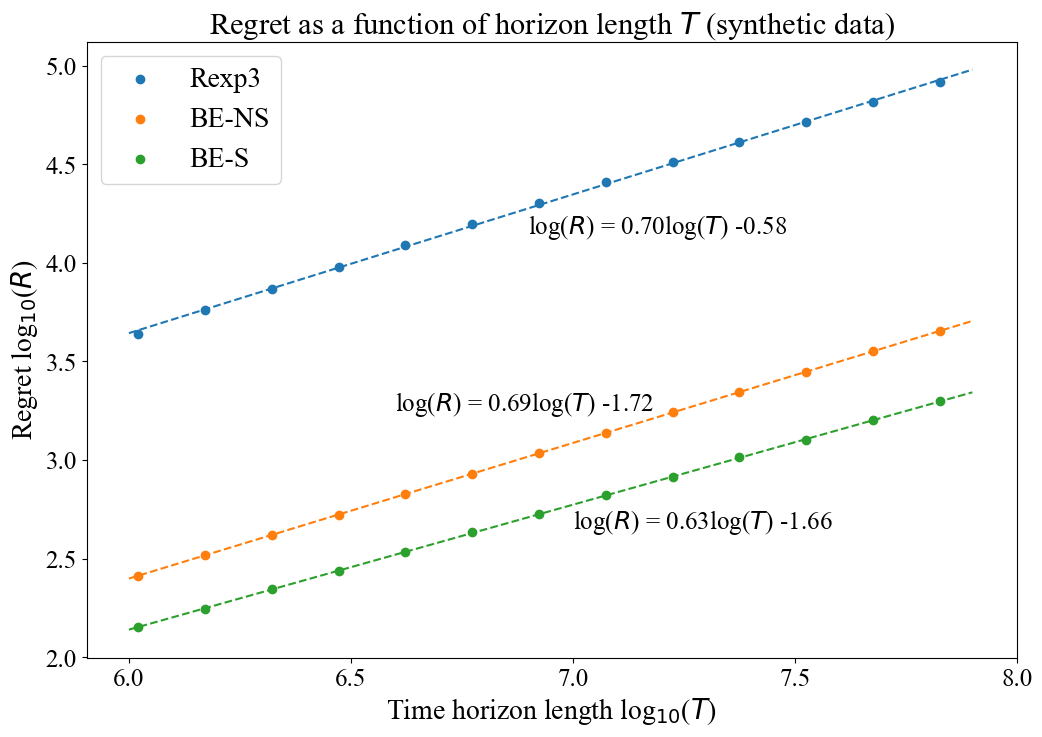

In [198]:
# Given data
x = np.array([7.82677989, 7.52574989, 7.2247199 , 6.9236899 , 6.6226599 ,
       6.32162991, 6.02059991, 7.67626489, 7.37523489, 7.0742049 ,
       6.7731749 , 6.47214491, 6.17111491])
y = np.array([4.91459074, 4.71277061, 4.5120952 , 4.30347512, 4.09091742,
       3.8659532 , 3.63912617, 4.81436192, 4.6110952 , 4.40709764,
       4.19660734, 3.97759743, 3.76102147])
y1 = np.array([3.65415957, 3.44796323, 3.24124291, 3.03473189, 2.82781112,
       2.62068543, 2.41248779, 3.55099314, 3.34449312, 3.13789935,
       2.93122387, 2.72382656, 2.51643717])
y2 = np.array([3.29848409, 3.10318038, 2.91307069, 2.72453073, 2.53417065,
       2.34590956, 2.15363915, 3.201993  , 3.01298127, 2.82162032,
       2.63444882, 2.43689539, 2.24718506])

# Perform linear regression to find the best-fit line
slope, intercept = np.polyfit(x, y, 1)
slope1, intercept1 = np.polyfit(x, y1, 1)
slope2, intercept2 = np.polyfit(x, y2, 1)

# Use Times New Roman font for LaTeX rendering
rc('font', family='Times New Roman')

# Plot the data points and the best-fit lines
plt.gcf().set_size_inches(12, 8)

plt.scatter(x, y, label="Rexp3")
plt.scatter(x, y1, label="BE-NS")
plt.scatter(x, y2, label="BE-S")
plt.legend(fontsize=20)

x_extended = np.arange(6,7.9,0.05)
line, = plt.plot(x_extended, slope * x_extended + intercept, '--', label="log($R$) = {:.2f}log($T$) {:.2f}".format(slope, intercept))
line1, = plt.plot(x_extended, slope1 * x_extended + intercept1, '--', label="log($R$) = {:.2f}log($T$) {:.2f}".format(slope1, intercept1))
line2, = plt.plot(x_extended, slope2 * x_extended + intercept2, '--', label="log($R$) = {:.2f}log($T$) {:.2f}".format(slope2, intercept2))

# Manually position the legend near the best fit lines
plt.annotate(line.get_label(), xy=(6.9, 4.05), xytext=(6.9, 4.15), fontsize=18)
plt.annotate(line1.get_label(), xy=(6.6, 3.25), xytext=(6.6, 3.25), fontsize=18)
plt.annotate(line2.get_label(), xy=(7.0, 2.65), xytext=(7.0, 2.65), fontsize=18)


plt.xlabel('Time horizon length log$_{10}$($T$)', fontsize=20)
plt.ylabel('Regret log$_{10}$($R$)', fontsize=20)
plt.xticks(np.arange(6,8.5,0.5), fontsize=18)
plt.yticks(np.arange(2,5.5,0.5), fontsize=18)
plt.title("Regret as a function of horizon length $T$ (synthetic data)", fontsize=22)